In [1]:
import numpy as np
import pandas as pd
from scipy import stats


In [2]:
df = pd.read_csv('/content/water_potability.csv')

In [3]:
df.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [5]:
df.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        55.844536     3.439711     0.000000  
50%      421.884968       14.218338        66.622485     3.955028     0.000000  
75%      481.792304       16.557652        77.337473     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

In [6]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [7]:
df.Potability.value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

In [8]:
df.corr()

ph  Hardness    Solids  Chloramines   Sulfate  \
ph               1.000000  0.082096 -0.089288    -0.034350  0.018203   
Hardness         0.082096  1.000000 -0.046899    -0.030054 -0.106923   
Solids          -0.089288 -0.046899  1.000000    -0.070148 -0.171804   
Chloramines     -0.034350 -0.030054 -0.070148     1.000000  0.027244   
Sulfate          0.018203 -0.106923 -0.171804     0.027244  1.000000   
Conductivity     0.018614 -0.023915  0.013831    -0.020486 -0.016121   
Organic_carbon   0.043503  0.003610  0.010242    -0.012653  0.030831   
Trihalomethanes  0.003354 -0.013013 -0.009143     0.017084 -0.030274   
Turbidity       -0.039057 -0.014449  0.019546     0.002363 -0.011187   
Potability      -0.003556 -0.013837  0.033743     0.023779 -0.023577   

                 Conductivity  Organic_carbon  Trihalomethanes  Turbidity  \
ph                   0.018614        0.043503         0.003354  -0.039057   
Hardness            -0.023915        0.003610        -0.013013  -0.014449   
Solids               0.013831        0.010242        -0.009143   0.019546   
Chloramines         -0.020486       -0.012653         0.017084   0.002363   
Sulfate             -0.016121        0.030831        -0.030274  -0.011187   
Conductivity         1.000000        0.020966         0.001285   0.005798   
Organic_carbon       0.020966        1.000000        -0.013274  -0.027308   
Trihalomethanes      0.001285       -0.013274         1.000000  -0.022145   
Turbidity            0.005798       -0.027308        -0.022145   1.000000   
Potability          -0.008128       -0.030001         0.007130   0.001581   

                 Potability  
ph                -0.003556  
Hardness          -0.013837  
Solids             0.033743  
Chloramines        0.023779  
Sulfate           -0.023577  
Conductivity      -0.008128  
Organic_carbon    -0.030001  
Trihalomethanes    0.007130  
Turbidity          0.001581  
Potability         1.000000

In [9]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

# **Data Visualization**

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px

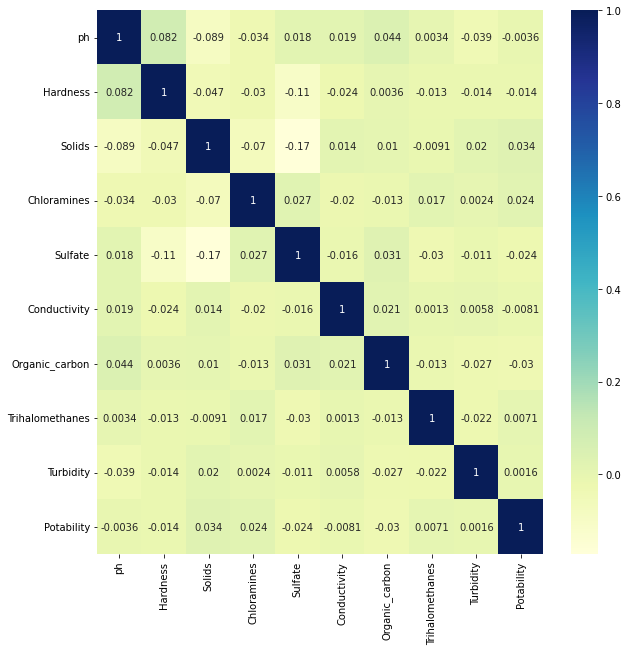

In [11]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True, cmap='YlGnBu')

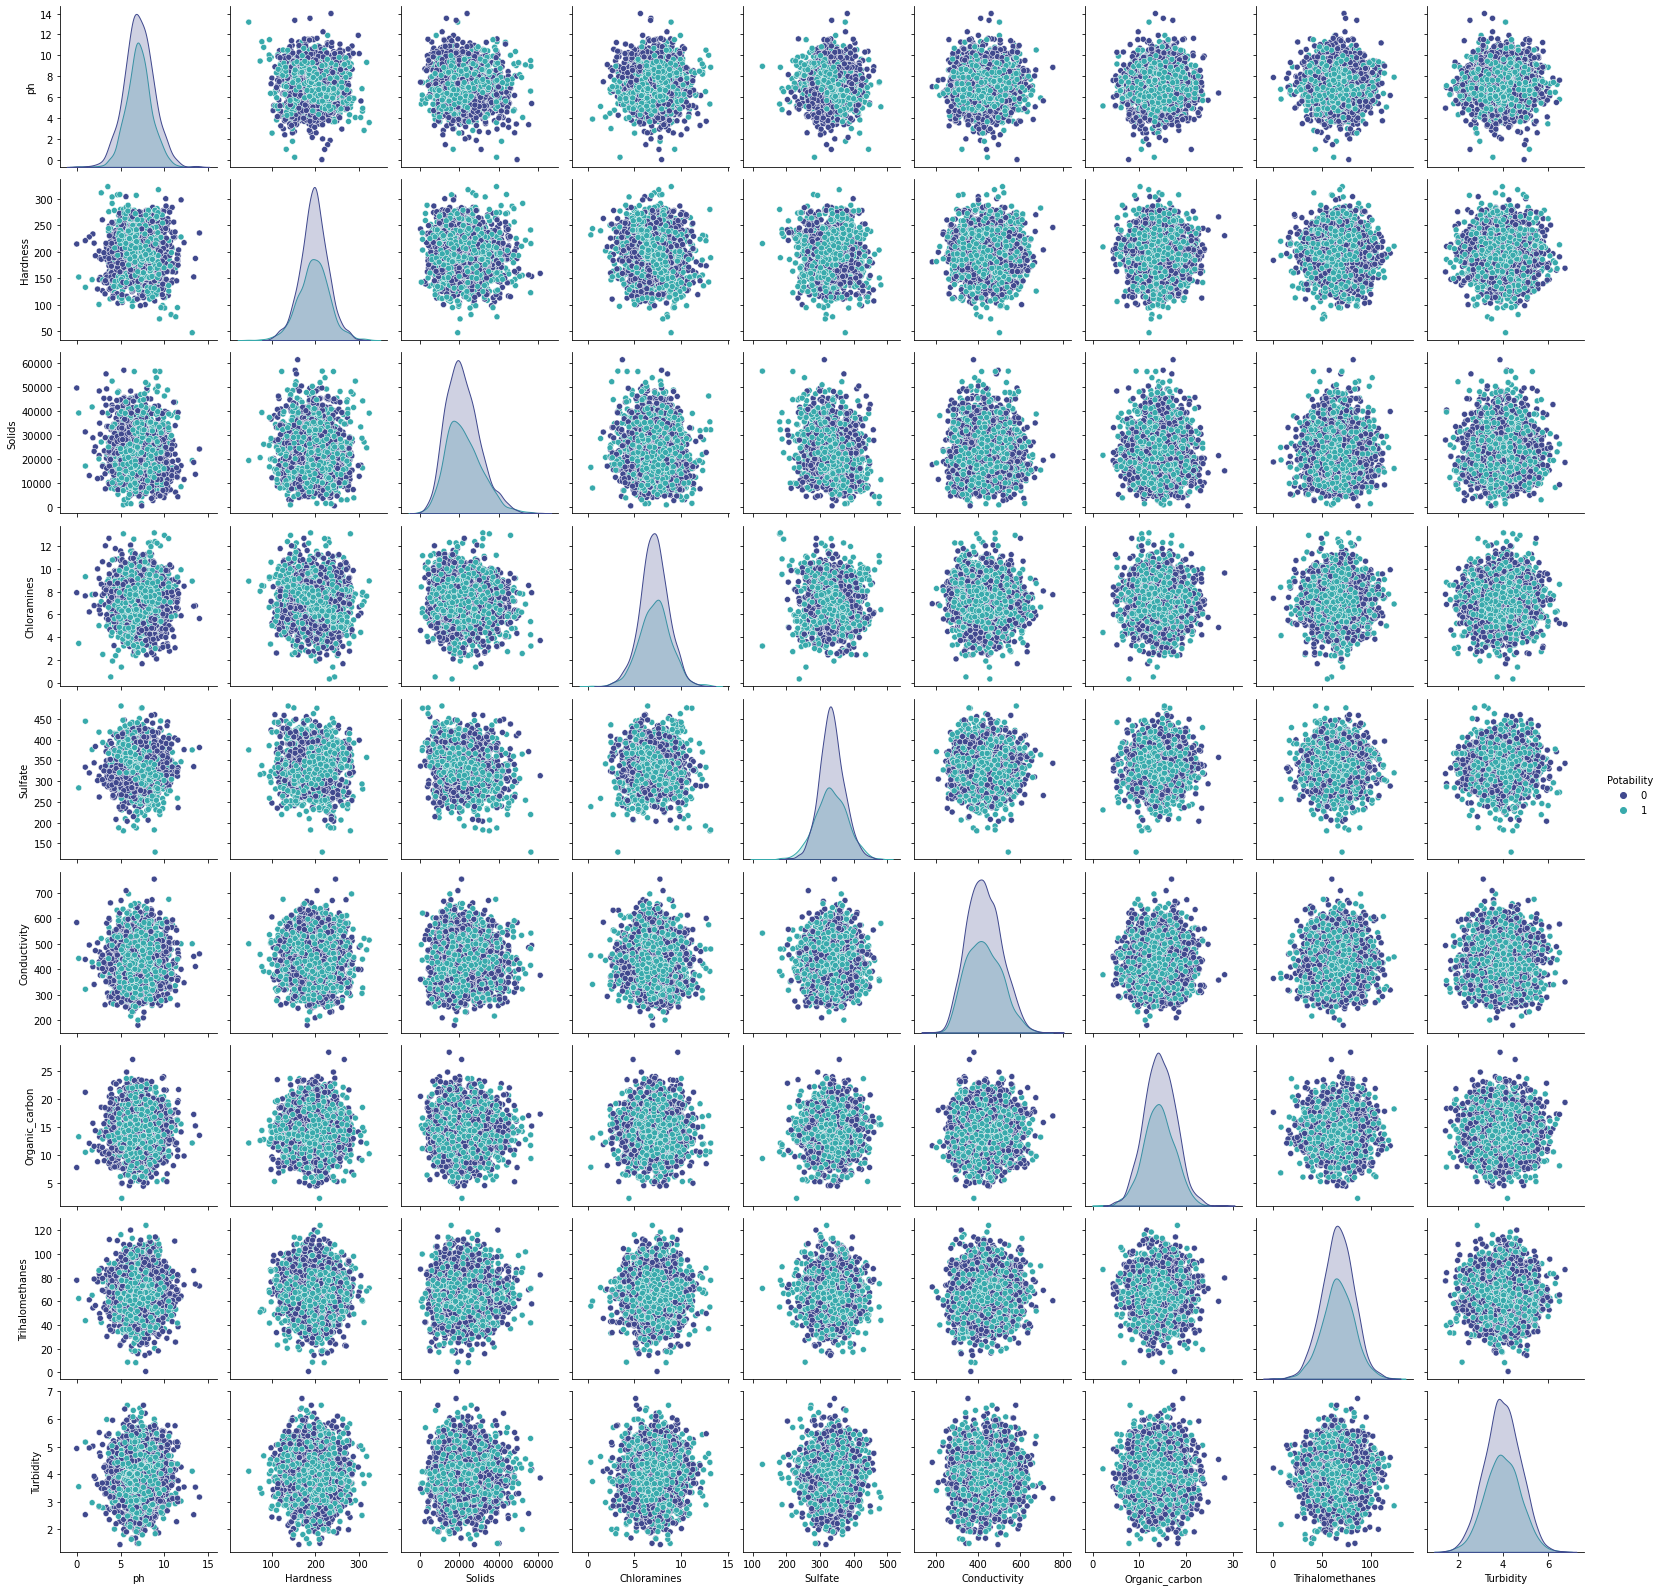

In [12]:

sns.pairplot(df, hue='Potability',palette='mako')

Text(0.5, 1.0, 'Potability Feature')

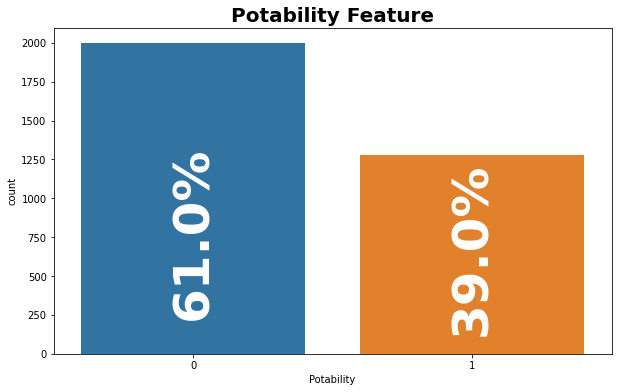

In [13]:

fig = plt.figure(figsize=(10,6))
ax=sns.countplot(data=df, x='Potability')
for i in ax.patches:
    ax.text(x=i.get_x()+i.get_width()/2, y=i.get_height()/7, s=f"{np.round(i.get_height()/len(df)*100,0)}%", ha='center', size=50, weight='bold', rotation=90, color='white')
plt.title("Potability Feature", size=20, weight='bold')


In [14]:
fig = px.scatter_matrix(df,
    dimensions=['ph', 'Hardness', 'Solids','Turbidity'],
    color="Potability")
fig.show()

In [15]:
fig = px.scatter(df, x="ph", y="Sulfate", color="Potability")
fig.show()

In [16]:
fig = px.histogram(df, x="Chloramines", color="Potability", marginal="violin", # can be `box`, `violin`
                         hover_data=df.columns)
fig.show()


In [17]:
fig = px.density_contour(df, x="Conductivity", y="Solids",color="Potability", marginal_x="rug", marginal_y="histogram")
fig.show()

In [18]:
def show_boxplot(df):
  for i in df.columns:
    fig = px.box(df, y=i, x="Potability", points="all")
    fig.show()

In [19]:
show_boxplot(df)

Text(0.5, 1.0, 'Boxplot for Turbidity')

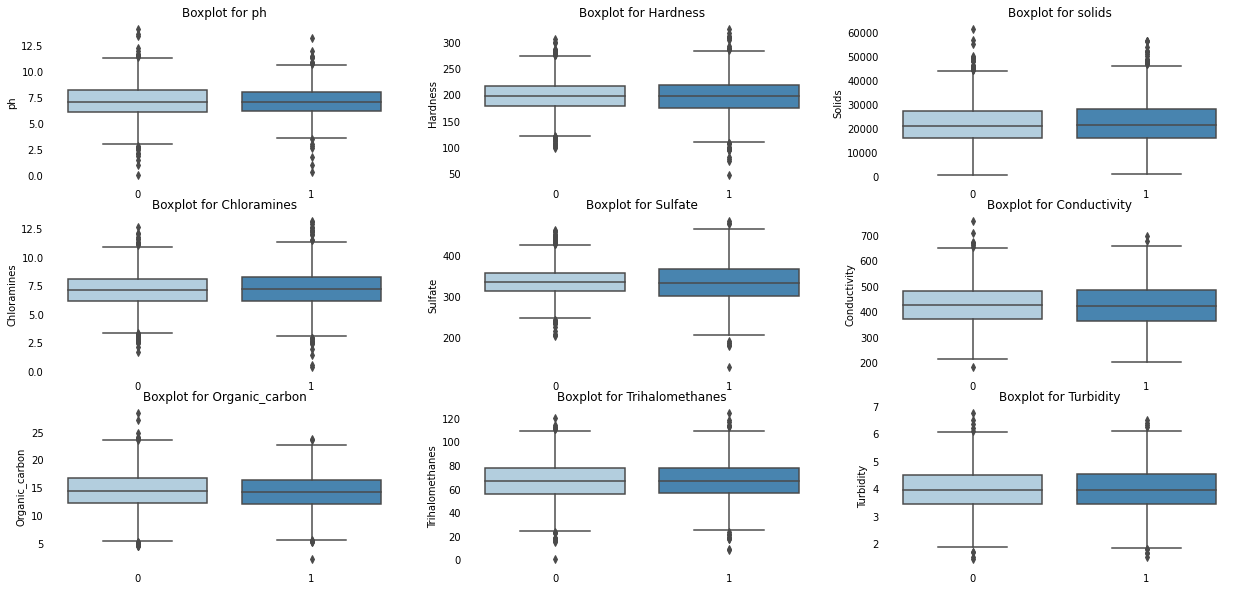

In [20]:
## Or you can try plotting like this

plt.figure(figsize=(21.2,10))

plt.subplot(3,3,1)
sns.boxplot(data=df, y="ph", x="Potability", palette='Blues')
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Boxplot for ph')

plt.subplot(3,3,2)
sns.boxplot(data=df, y='Hardness', x="Potability", palette='Blues')
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Boxplot for Hardness')

plt.subplot(3,3,3)
sns.boxplot(data=df, y='Solids', x="Potability", palette='Blues')
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Boxplot for solids')

plt.subplot(3,3,4)
sns.boxplot(data=df, y='Chloramines', x="Potability", palette='Blues')
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Boxplot for Chloramines')

plt.subplot(3,3,5)
sns.boxplot(data=df, y='Sulfate', x="Potability", palette='Blues')
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Boxplot for Sulfate')

plt.subplot(3,3,6)
sns.boxplot(data=df, y="Conductivity", x="Potability", palette='Blues')
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Boxplot for Conductivity')

plt.subplot(3,3,7)
sns.boxplot(data=df, y="Organic_carbon", x="Potability", palette='Blues')
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Boxplot for Organic_carbon')

plt.subplot(3,3,8)
sns.boxplot(data=df, y="Trihalomethanes", x="Potability", palette='Blues')
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Boxplot for Trihalomethanes')


plt.subplot(3,3,9)
sns.boxplot(data=df, y="Turbidity", x="Potability", palette='Blues')
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Boxplot for Turbidity')



In [21]:
### The above code can also be written like this 
'''
fig, ax= plt.subplots(nrows=3,ncols=3,figsize=(15,15), constrained_layout=True)
plt.suptitle('Feature distribution by Potability class and Approved limit', size=20, weight='bold')
ax=ax.flatten()
for x, i in enumerate(int_cols):
    sns.boxplot(data=df, y=i, x='Potability', ax=ax[x])
    #l,k = limit.iloc[:,x]
    #ax[x].add_patch(Rectangle(xy=(l,0), width=k-l, height=1, alpha=0.5))
    for s in ['left','right','top','bottom']:
        ax[x].spines[s].set_visible(False)
  '''

"\nfig, ax= plt.subplots(nrows=3,ncols=3,figsize=(15,15), constrained_layout=True)\nplt.suptitle('Feature distribution by Potability class and Approved limit', size=20, weight='bold')\nax=ax.flatten()\nfor x, i in enumerate(int_cols):\n    sns.boxplot(data=df, y=i, x='Potability', ax=ax[x])\n    #l,k = limit.iloc[:,x]\n    #ax[x].add_patch(Rectangle(xy=(l,0), width=k-l, height=1, alpha=0.5))\n    for s in ['left','right','top','bottom']:\n        ax[x].spines[s].set_visible(False)\n  "

As you can understand from the boxplots we can see that there are several outliers in our data...so we'll try to remove them and see whether we get a good metric score.

But first we need to fill up the nan values in our data. 

# Imputing missing Values using KNN Imputer

In [22]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)

In [23]:
df_impute = imputer.fit_transform(df)
df = pd.DataFrame(df_impute,columns=df.columns)
df.head()


ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0  7.156857  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246  336.094350    592.885359   
2  8.099124  224.236259  19909.541732     9.275884  330.449166    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135         0.0  
1       15.180013        56.329076   4.500656         0.0  
2       16.868637        66.420093   3.055934         0.0  
3       18.436524       100.341674   4.628771         0.0  
4       11.558279        31.997993   4.075075         0.0

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



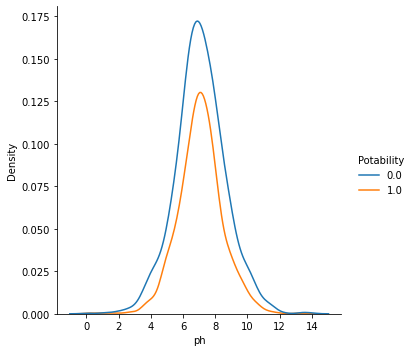

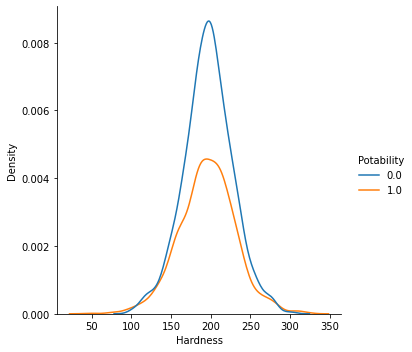

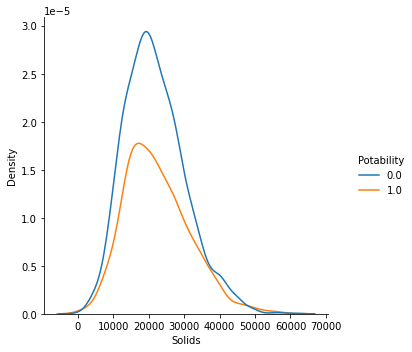

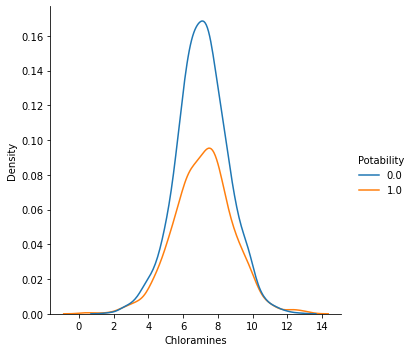

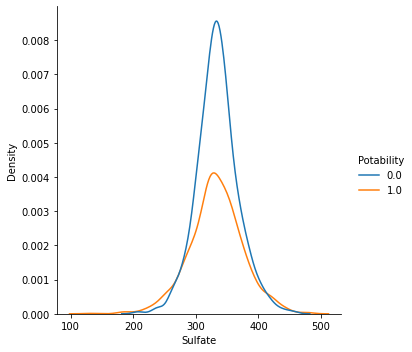

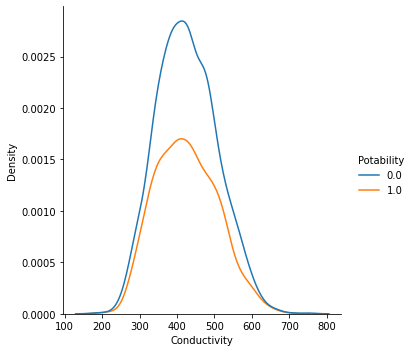

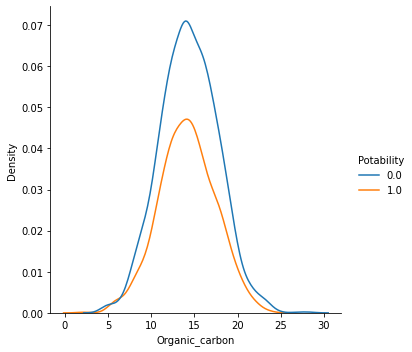

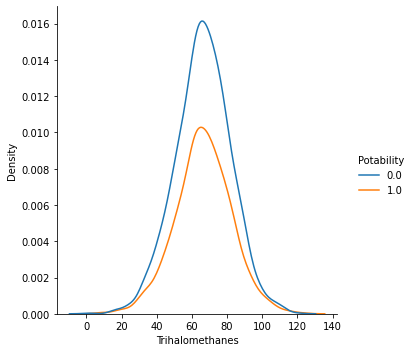

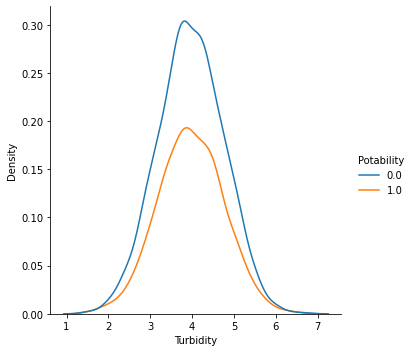

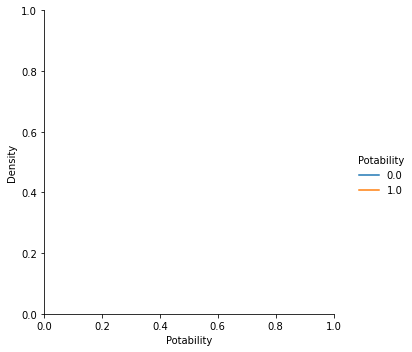

In [24]:
def show_kde(df):
  for i in df.columns:
    sns.displot(data=df, x=i, kind="kde",hue='Potability')

show_kde(df)

Now that we've imputed our missing values, let's move on ahead with removing outliers

# Analysis of Outliers

In [25]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [26]:

z_1 = np.abs(stats.zscore(df['ph']))
z_2 = np.abs(stats.zscore(df['Hardness']))
z_3 = np.abs(stats.zscore(df['Solids']))
z_4 = np.abs(stats.zscore(df['Chloramines']))
z_5 = np.abs(stats.zscore(df['Sulfate']))
z_6 = np.abs(stats.zscore(df['Conductivity']))
z_7 = np.abs(stats.zscore(df['Organic_carbon']))
z_8 = np.abs(stats.zscore(df['Trihalomethanes']))
z_9 = np.abs(stats.zscore(df['Turbidity']))


In [27]:

threshold = 3
 
# Position of the outlier
print(np.where(z_1 > 3))
print(np.where(z_2 > 3))
print(np.where(z_3 > 3))
print(np.where(z_4 > 3))
print(np.where(z_5 > 3))
print(np.where(z_6 > 3))
print(np.where(z_7 > 3))
print(np.where(z_8 > 3))
print(np.where(z_9 > 3))


(array([  80,  263,  692,  726,  783,  810, 1303, 1343, 2075, 2189, 2343,
       2646, 2681, 2868, 2895, 2899, 2928, 3014, 3020, 3088, 3094]),)
(array([  37,   88,  263,  278,  317,  321,  335,  347,  354,  379,  383,
       1490, 1542, 2646, 2861, 3179, 3221, 3269]),)
(array([ 283,  366,  546,  666, 1031, 1068, 1077, 1186, 1554, 1746, 1784,
       1955, 2497, 2602, 3014, 3130, 3150, 3162, 3190, 3226]),)
(array([ 272,  275,  285,  287,  304,  351,  434,  509,  757, 2302, 2336,
       2350, 2370, 2401, 2424, 2446, 2447, 2470, 2694, 2699]),)
(array([ 253,  272,  275,  351,  357,  365,  385,  786, 1106, 1186, 1292,
       1366, 1523, 1537, 1554, 1563, 1605, 1642, 1743, 1773, 1798, 1860,
       2156, 2204, 2318, 2726, 2853]),)
(array([  66,  140,  342, 1384, 2134, 2704, 3142]),)
(array([ 785, 1792, 2057, 2236]),)
(array([  61,  245,  330,  531,  951, 1075, 1123, 1156, 1157, 1316, 1360,
       1630, 2121, 2353, 2376, 2949, 3035, 3184]),)
(array([ 382,  492,  990, 1073, 1290, 1892, 2757, 292

In [28]:
df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

In [ ]:
df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

# Splitting our data

In [29]:
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [30]:
X = df.drop('Potability',axis=1)
y = df.Potability

In [31]:
### creating our train,test and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=0.2, shuffle =True, stratify=y, random_state = 0)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
    test_size=0.25, stratify=y_train, random_state = 0)

# **Feature Selection**

##  1. **Using Pearson Corelation**

In [32]:
X_train.shape, y_train.shape

((1884, 9), (1884,))

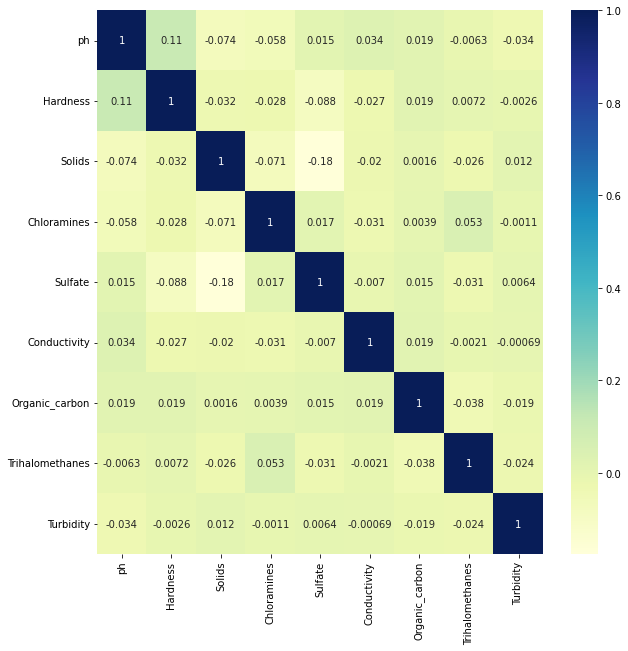

In [33]:
plt.figure(figsize=(10,10))
sns.heatmap(X_train.corr(),annot=True, cmap='YlGnBu')

In [34]:
def correlation(dataset,threshold):
    col_corr = set() # set of names of all the columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i,j]) > threshold:# we r intrested in coeff value
                col_name = corr_matrix.columns[i] # getting the name of column
                col_corr.add(col_name)
    return col_corr

In [35]:
corr_features = correlation(X,0.85)
len(set(corr_features))

0

In [36]:
corr_features

set()

There are no features that have a correaltion greater that 85% with the target classes 

## 2. **Using ExtraTressClassifier** 

In [37]:
## Feature Importance
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()

In [38]:
model.fit(X_train,y_train)

ExtraTreesClassifier()

In [39]:
print(model.feature_importances_)

[0.12195301 0.11631082 0.11313216 0.11189589 0.12874994 0.10342231
 0.1016872  0.10183263 0.10101603]


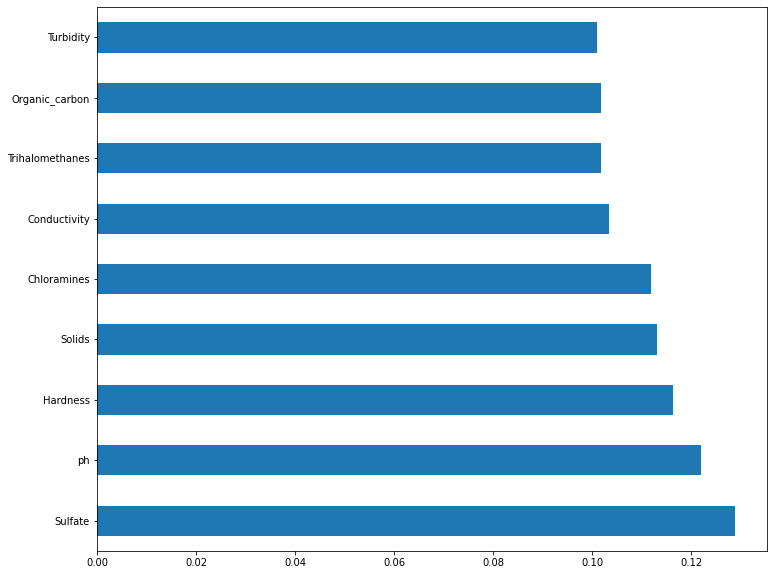

In [40]:
## plot graph of feature importance for better visualization

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(9).plot(kind='barh',figsize=(12,10))
plt.show()

All columns have almost equal importance so it won't be necessary to drop any column.

There are also 9 feature columns so i won't drop any of them....this was just to show that if u want you can drop the column to reduce the set of input features.

# **Feature Scaling**

In [41]:
from sklearn.preprocessing import StandardScaler 
scaler=StandardScaler()
X_train_scaled =scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)



In [42]:
X_train = pd.DataFrame(X_train_scaled,columns=X_train.columns)

In [43]:
X_val = pd.DataFrame(X_val_scaled,columns=X_val.columns)
X_test = pd.DataFrame(X_test_scaled,columns=X_test.columns)

# **Prediction and Evaluation**

In [44]:
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RandomizedSearchCV , GridSearchCV

In [45]:
mod = []
cv_score=[]
model =[AdaBoostClassifier(), BaggingClassifier(), GradientBoostingClassifier(), RandomForestClassifier(), DecisionTreeClassifier(), LogisticRegression(), SGDClassifier(), XGBClassifier(), lgb.LGBMClassifier(), GaussianNB()]
for m in model:
    cv_score.append(cross_val_score(m, X_train, y_train, scoring='accuracy', cv=10).mean())
    mod.append(m)
model_df=pd.DataFrame(columns=['model','cv_score'])
model_df['model']=mod
model_df['cv_score']=cv_score
model_df.sort_values(by=['cv_score'], ascending=True).style.background_gradient(subset=['cv_score'])

## 1. Using RandomForestClassifier

In [46]:
rfc = RandomForestClassifier()

In [47]:
model_1 = rfc.fit(X_train,y_train)
pred_1 = rfc.predict(X_val)

In [48]:
print(classification_report(y_val,pred_1))

              precision    recall  f1-score   support

         0.0       0.68      0.89      0.77       388
         1.0       0.65      0.33      0.44       240

    accuracy                           0.68       628
   macro avg       0.66      0.61      0.60       628
weighted avg       0.67      0.68      0.64       628



In [49]:
# RANDOMIZED SEARCH CV
# HYPERPARAMETERS

## no.of trees in the radnom forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]

## criterion
criterion = ["gini", "entropy"]

## no.of features to consider at every split
max_features = ['auto','sqrt']

## max no of levels of trees
max_depth = [int(x) for x in np.linspace(5,30,num=6)]

## min no of samples required to split a node
min_samples_split = [2,5,10,15,100]

## min no. of samples required at each leaf node
min_samples_leaf = [1,2,3,10]

In [50]:
# create the random grid
random_grid = { 'n_estimators' : n_estimators,
               'criterion' : criterion,
               'max_features' : max_features,
               'max_depth' : max_depth,
               'min_samples_split' : min_samples_split,
               'min_samples_leaf' : min_samples_leaf
               }
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'criterion': ['gini', 'entropy'], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 3, 10]}


In [51]:
rfc_random = RandomizedSearchCV(estimator = rfc,
                               param_distributions=random_grid,
                               scoring='accuracy',
                               n_iter = 10,
                               cv = 5,
                               verbose = 2,
                               random_state = 0,
                               n_jobs = 1)

In [52]:
rfc_random.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=30, criterion=gini 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=30, criterion=gini, total=   4.9s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=30, criterion=gini 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.9s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=30, criterion=gini, total=   4.8s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=30, criterion=gini 
[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=30, criterion=gini, total=   4.9s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=30, criterion=gini 
[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=30, criterion=gini, total=   4.9s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=30, criterion=gini 
[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=30, criterion=gini, total=   5.0s
[CV] n_estimators=400, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=30, criterion=gini 
[CV]  n_estimators=400, min

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  7.5min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   n_jobs=1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 3, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=0, scoring='accuracy', verbose=2)

In [53]:
rfc_random.best_params_

{'n_estimators': 300,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 25,
 'criterion': 'gini'}

In [60]:

rfc_2 = RandomForestClassifier(n_estimators= 300,
 min_samples_split= 2,
 min_samples_leaf= 2,
 max_features= 'sqrt',
 max_depth= 25,
 criterion= 'gini')

In [61]:
model_2 = rfc_2.fit(X_train,y_train)

In [62]:
pred_2 = rfc_2.predict(X_val)
print(classification_report(y_val,pred_2))

              precision    recall  f1-score   support

         0.0       0.68      0.89      0.77       388
         1.0       0.65      0.32      0.43       240

    accuracy                           0.68       628
   macro avg       0.67      0.61      0.60       628
weighted avg       0.67      0.68      0.64       628



In [63]:
pred = rfc_random.predict(X_val)

In [64]:
print(classification_report(y_val,pred))

              precision    recall  f1-score   support

         0.0       0.67      0.90      0.77       388
         1.0       0.64      0.28      0.39       240

    accuracy                           0.67       628
   macro avg       0.66      0.59      0.58       628
weighted avg       0.66      0.67      0.63       628



## 2. **Using Gradient Boosting and Bagging Classifier**

In [65]:
param={'n_estimators': [60,70,80,100,200,300,400,500,600,700]}
grid_Grd=GridSearchCV(GradientBoostingClassifier(), param_grid=param, cv=5, scoring='accuracy')
grid_Grd.fit(X_train, y_train)
print(f"Best Estimator: {grid_Grd.best_params_} , Best Score : {grid_Grd.best_score_}")


param={'n_estimators': [60,70,80,100,200,300,400,500,600,700]}
grid_Bag=GridSearchCV(BaggingClassifier(), param_grid=param, cv=5, scoring='accuracy')
grid_Bag.fit(X_train, y_train)
print(f"Best Estimator: {grid_Bag.best_params_} , Best Score : {grid_Bag.best_score_}")

Best Estimator: {'n_estimators': 500} , Best Score : 0.6406766747559116
Best Estimator: {'n_estimators': 700} , Best Score : 0.6634869349286078




## 1. XGBoost Classifier 




In [66]:
xg = XGBClassifier()

In [67]:
model_3 = xg.fit(X_train,y_train)
pred_3 = model_3.predict(X_val)
score_3 = accuracy_score(pred_3,y_val)
print(score_3)

0.6512738853503185


In [68]:
param_grid = {'gamma': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4, 200],
              'learning_rate': [0.01, 0.03, 0.06, 0.1, 0.15, 0.2, 0.25, 0.300000012, 0.4, 0.5, 0.6, 0.7],
              'max_depth': [5,6,7,8,9,10,11,12,13,14],
              'n_estimators': [50,65,80,100,115,130,150,200,300],
              'reg_alpha': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
              'reg_lambda': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200]}

In [69]:
rs_xg=RandomizedSearchCV(xg,param_distributions=param_grid,n_jobs=-1,n_iter=20,cv=5,verbose=3,scoring='precision')

In [70]:
model_rs = rs_xg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   12.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   34.6s finished


In [71]:
pred_rs_xg = rs_xg.predict(X_val)
score_rs = accuracy_score(pred_rs_xg,y_val)
print(score_rs)

0.6544585987261147


# 1. LGBM Classifier

In [72]:
import lightgbm as lgb
lgb_clf = lgb.LGBMClassifier()

In [73]:
model_4 = lgb_clf.fit(X_train,y_train)
pred_4 = lgb_clf.predict(X_val)
score_4 = accuracy_score(pred_4,y_val)
print(score_4)

0.6257961783439491


# Evaluation on test data

In [74]:
pred = model_4.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       0.67      0.79      0.73       388
         1.0       0.53      0.38      0.44       240

    accuracy                           0.63       628
   macro avg       0.60      0.59      0.58       628
weighted avg       0.62      0.63      0.62       628



In [75]:
pred = model_1.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       0.67      0.87      0.76       388
         1.0       0.60      0.31      0.41       240

    accuracy                           0.66       628
   macro avg       0.64      0.59      0.59       628
weighted avg       0.65      0.66      0.63       628



In [76]:
pred = model_2.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       0.68      0.89      0.77       388
         1.0       0.66      0.33      0.43       240

    accuracy                           0.68       628
   macro avg       0.67      0.61      0.60       628
weighted avg       0.67      0.68      0.64       628



In [77]:
pred = rfc_random.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       0.67      0.89      0.77       388
         1.0       0.62      0.30      0.41       240

    accuracy                           0.66       628
   macro avg       0.65      0.60      0.59       628
weighted avg       0.65      0.66      0.63       628



In [78]:
pred = model_3.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       0.65      0.87      0.75       388
         1.0       0.54      0.24      0.33       240

    accuracy                           0.63       628
   macro avg       0.59      0.56      0.54       628
weighted avg       0.61      0.63      0.59       628



In [79]:
pred = model_rs.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       0.66      0.91      0.77       388
         1.0       0.65      0.25      0.37       240

    accuracy                           0.66       628
   macro avg       0.66      0.58      0.57       628
weighted avg       0.66      0.66      0.62       628



In [80]:
pred = grid_Bag.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       0.68      0.85      0.76       388
         1.0       0.60      0.37      0.45       240

    accuracy                           0.66       628
   macro avg       0.64      0.61      0.61       628
weighted avg       0.65      0.66      0.64       628



In [81]:
pred = grid_Grd.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       0.68      0.79      0.73       388
         1.0       0.54      0.39      0.45       240

    accuracy                           0.64       628
   macro avg       0.61      0.59      0.59       628
weighted avg       0.63      0.64      0.63       628



# Saving the model

In [82]:
import pickle
pickle.dump(model_2, open('model.pkl','wb'))
pickle.dump(scaler,open('scaler.pkl','wb'))

In [83]:
loaded_model = pickle.load(open('./model.pkl','rb'))

In [84]:
loaded_model.predict(X_test.head(10))

array([0., 1., 0., 0., 0., 0., 0., 1., 0., 0.])